# Housing Price Project

This is a project that uses regression to determine the prices of houses. The sample dataset contains 20,000 rows and 21 columns. 

## Import Libraries

In [32]:
import pandas as pd # Data Analysis and cleaning
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
# import numpy as np 
import plotly.express as px # Data Visualization

## Load Dataset

In [33]:
housing_prices = pd.read_csv("Part1_house_price.csv")

In [34]:
# Checking for a sample size of the dataset
housing_prices.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3616,4310702775,20150203T000000,280000.0,2,1.50,800,1196,2.0,0,0,...,8,800,0,2003,0,98103,47.6972,-122.341,1020,1087
973,3629790160,20140724T000000,524250.0,3,2.50,1710,3469,2.0,0,0,...,8,1710,0,1999,0,98029,47.5460,-122.011,2120,3560
6986,3342100780,20140709T000000,583000.0,3,2.50,2600,5100,2.0,0,1,...,8,2600,0,1998,0,98056,47.5175,-122.205,2270,5400
8441,2188201010,20150121T000000,245000.0,3,2.25,1530,12000,1.0,0,0,...,7,1070,460,1979,0,98023,47.2715,-122.338,2140,13636
1412,2171400218,20150416T000000,245000.0,4,1.50,1280,8000,1.0,0,0,...,6,1280,0,1960,0,98178,47.4949,-122.255,1420,8211
8008,293850040,20150205T000000,495500.0,3,2.50,3190,7828,2.0,0,0,...,9,3190,0,2006,0,98059,47.5047,-122.144,2970,7828
6728,6929603769,20140721T000000,253000.0,3,1.00,1400,9750,1.0,0,0,...,7,1400,0,1968,1998,98198,47.3862,-122.304,1640,8050
16555,2781270080,20141030T000000,249900.0,2,2.00,1470,2541,2.0,0,0,...,6,1470,0,2005,0,98038,47.3502,-122.020,1310,2721
3359,9158800090,20140703T000000,400000.0,4,2.25,2230,7200,1.0,0,0,...,7,1300,930,1963,0,98133,47.7648,-122.330,2010,7752
6399,2475900840,20150427T000000,258000.0,2,1.00,750,7000,1.0,0,0,...,6,750,0,1932,0,98024,47.5655,-121.890,1100,8777


In [35]:
# Checking for null values
housing_prices.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values present.

In [36]:
# Checking for data types
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   price          20000 non-null  float64
 3   bedrooms       20000 non-null  int64  
 4   bathrooms      20000 non-null  float64
 5   sqft_living    20000 non-null  int64  
 6   sqft_lot       20000 non-null  int64  
 7   floors         20000 non-null  float64
 8   waterfront     20000 non-null  int64  
 9   view           20000 non-null  int64  
 10  condition      20000 non-null  int64  
 11  grade          20000 non-null  int64  
 12  sqft_above     20000 non-null  int64  
 13  sqft_basement  20000 non-null  int64  
 14  yr_built       20000 non-null  int64  
 15  yr_renovated   20000 non-null  int64  
 16  zipcode        20000 non-null  int64  
 17  lat            20000 non-null  float64
 18  long  

In [37]:
# Convert date format to YYYY-MM-DD
housing_prices["date"] = housing_prices["date"].str[:8].astype("int64")

In [38]:
housing_prices.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4391,5416501030,20141124,399000.0,4,2.5,2800,4687,2.0,0,0,...,9,2800,0,2005,0,98038,47.3594,-122.04,2750,4750


In [39]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  int64  
 2   price          20000 non-null  float64
 3   bedrooms       20000 non-null  int64  
 4   bathrooms      20000 non-null  float64
 5   sqft_living    20000 non-null  int64  
 6   sqft_lot       20000 non-null  int64  
 7   floors         20000 non-null  float64
 8   waterfront     20000 non-null  int64  
 9   view           20000 non-null  int64  
 10  condition      20000 non-null  int64  
 11  grade          20000 non-null  int64  
 12  sqft_above     20000 non-null  int64  
 13  sqft_basement  20000 non-null  int64  
 14  yr_built       20000 non-null  int64  
 15  yr_renovated   20000 non-null  int64  
 16  zipcode        20000 non-null  int64  
 17  lat            20000 non-null  float64
 18  long  

In [40]:
# Correlation Matrix
correlation = housing_prices.corr()
correlation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009114,-0.015001,0.001319,0.002896,-0.013115,-0.136244,0.016064,-0.002530,0.013126,...,0.007036,-0.013140,-0.002709,0.018656,-0.016077,-0.007161,-0.001542,0.011681,-0.009457,-0.144805
date,0.009114,1.000000,0.000513,-0.010667,-0.030897,-0.030881,0.005161,-0.027766,-0.004696,0.000474,...,-0.033717,-0.025121,-0.016930,0.002031,-0.025623,0.000120,-0.029644,0.002537,-0.019568,0.000197
price,-0.015001,0.000513,1.000000,0.302251,0.523941,0.701250,0.085823,0.278866,0.268666,0.400225,...,0.665437,0.604985,0.321837,0.040316,0.135632,-0.044521,0.309454,0.011707,0.595727,0.077647
bedrooms,0.001319,-0.010667,0.302251,1.000000,0.517139,0.566322,0.029946,0.201525,-0.007204,0.077548,...,0.354602,0.460107,0.311535,0.157858,0.021463,-0.140396,0.001642,0.113977,0.374479,0.026115
bathrooms,0.002896,-0.030897,0.523941,0.517139,1.000000,0.760377,0.092251,0.503112,0.067608,0.195108,...,0.660382,0.684341,0.297576,0.487050,0.066193,-0.203861,0.027264,0.221651,0.575333,0.090736
sqft_living,-0.013115,-0.030881,0.701250,0.566322,0.760377,1.000000,0.171386,0.391932,0.107383,0.285543,...,0.766485,0.869714,0.446271,0.321798,0.064580,-0.184319,0.061972,0.221974,0.753095,0.181547
sqft_lot,-0.136244,0.005161,0.085823,0.029946,0.092251,0.171386,1.000000,0.015858,0.021823,0.069355,...,0.117625,0.186257,0.009035,0.076964,0.005529,-0.129324,-0.089458,0.231360,0.151502,0.707850
floors,0.016064,-0.027766,0.278866,0.201525,0.503112,0.391932,0.015858,1.000000,0.031871,0.047852,...,0.464396,0.567726,-0.236423,0.431846,0.027754,-0.077211,0.039919,0.155365,0.317891,0.011203
waterfront,-0.002530,-0.004696,0.268666,-0.007204,0.067608,0.107383,0.021823,0.031871,1.000000,0.404982,...,0.085797,0.076259,0.078987,-0.022071,0.093511,0.033106,-0.015095,-0.044640,0.089597,0.031871
view,0.013126,0.000474,0.400225,0.077548,0.195108,0.285543,0.069355,0.047852,0.404982,1.000000,...,0.257722,0.169527,0.270332,-0.045198,0.105018,0.091940,0.006394,-0.086152,0.287376,0.067255


In [41]:
# Drop unnecessary columns
housing_prices.drop(columns=["id", "zipcode", "date"], axis=1, inplace=True)

## Data Analysis

In [42]:
# Statistical Analysis
housing_prices.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.000000e+04,20000.00000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,5.355679e+05,3.36445,2.072013,2057.90700,1.560637e+04,1.444950,0.00795,0.241800,3.441750,7.605750,1757.47270,300.43430,1967.956500,90.807500,47.56039,-122.215160,1974.286850,13115.936600
std,3.661845e+05,0.93374,0.762412,905.62543,4.177024e+04,0.516776,0.08881,0.777922,0.665454,1.172598,811.60698,447.61877,28.317996,415.937997,0.13932,0.139578,675.242028,26942.695517
min,7.500000e+04,0.00000,0.000000,290.00000,5.200000e+02,1.000000,0.00000,0.000000,1.000000,1.000000,290.00000,0.00000,1900.000000,0.000000,47.15590,-122.519000,399.000000,651.000000
25%,3.170000e+05,3.00000,1.500000,1420.00000,5.350000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1180.00000,0.00000,1950.000000,0.000000,47.46755,-122.327000,1490.000000,5347.750000
50%,4.499500e+05,3.00000,2.000000,1900.00000,7.819000e+03,1.000000,0.00000,0.000000,3.000000,7.000000,1540.00000,0.00000,1969.000000,0.000000,47.57295,-122.232000,1830.000000,7778.500000
75%,6.400000e+05,4.00000,2.500000,2510.00000,1.100000e+04,2.000000,0.00000,0.000000,4.000000,8.000000,2150.00000,590.00000,1991.000000,0.000000,47.67900,-122.127000,2337.000000,10240.000000
max,7.700000e+06,33.00000,8.000000,13540.00000,1.651359e+06,3.500000,1.00000,4.000000,5.000000,13.000000,9410.00000,4820.00000,2015.000000,2015.000000,47.77760,-121.315000,6210.000000,871200.000000


From the analysis, there are 20,000 rows in each of the 21 columns. The mean price is 535,567.9 USD while the minimum prices is 75,000 and maximum price is 7,700,000 USD. Most values lie between 317,000 and 640,000. In price, sqft_lot and sqft_lot15, the maximum values are way higher than the upper quartile range which makes the mean deviate slightly from the median. This means, they have many outliers.

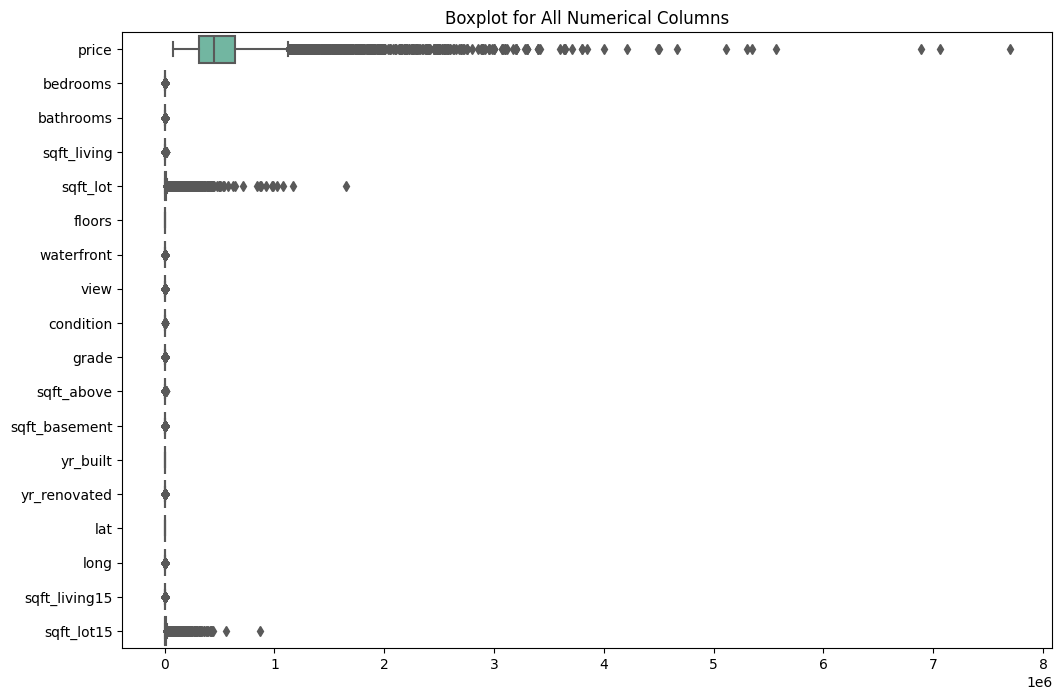

In [43]:
# Boxplot for all columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=housing_prices, orient="h", palette="Set2")
plt.title("Boxplot for All Numerical Columns")
plt.show()

In [67]:
# Finding the location from where the dataset was collected
# Using Plotly
fig = px.scatter_geo(housing_prices, lat='lat', lon='long'
                    )
fig.update_layout(title="Houses Location", geo_scope="usa")

#fig.update_geos(projection_type="natural earth")
fig.show()

From the map, it is clear that the dataset was collected from houses in Washington, USA. In addition, the houses are located in the same area hence the assumption they are all in the same neighborhood.

## Model Creation

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [47]:
# Splitting the dataset
X = housing_prices.drop(columns="price")
y=housing_prices["price"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Instantiate the model
model = LinearRegression()

In [50]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction

In [51]:
y_pred = model.predict(X_test)

## Performance Metrics

In [52]:
## R2_Score and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  45990431828.04386
The R2 Score is:  0.7064191702264431
The MAE score is:  125328.42813267212


The high MSE score is due to the presence of outliers in the columns of the dataset. Mean Squared Error is sensitive to outliers.

## 2. Random Forest

In [53]:
# Instantiate the model
random_model = RandomForestRegressor()

In [54]:
# Fit the model
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
# Make Predictions
y_test_pred = random_model.predict(X_test)

In [56]:
# Perfomance metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  16821157176.29149
The R2 Score is:  0.8926218109881765
The MAE score is:  71191.34140023214


## 3. Gradient Boosting

In [57]:
boost_model = GradientBoostingRegressor()

In [58]:
boost_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [59]:
y_test_pred = boost_model.predict(X_test)

In [60]:
# Perfomance metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  17078591519.846546
The R2 Score is:  0.8909784737723903
The MAE score is:  77947.6247340962


These are the scores for the three models without feature engineering. 

## Feature Engineering

### Standardization

In [68]:
from sklearn.preprocessing import StandardScaler

# Instantiate Scaler
scaler = StandardScaler()

housing_prices = scaler.fit_transform(housing_prices)

In [71]:
housing_prices.head()

In [ ]:
# Splitting the dataset
X_scaled = housing_prices.drop(columns="price")
y_scaled =housing_prices["price"]

In [64]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression

In [65]:
# Instantiate model
model = LinearRegression()

# Fit model
model.fit(X_scaled_train, y_scaled_train)

# Predict model
y_pred = model.predict(X_scaled_test)

# Performance metrics
mse = mean_squared_error(y_scaled_test, y_pred)
r2 = r2_score(y_scaled_test, y_pred)
mae = mean_absolute_error(y_scaled_test, y_pred)
print("The MSE score is: ", mse)
print("The R2 Score is: ", r2)
print("The MAE score is: ", mae)

The MSE score is:  45990431828.04386
The R2 Score is:  0.7064191702264431
The MAE score is:  125328.42813267212
